<center><font size = "10"> Week 12 - Network Simulation III <center>
<center><font size = "8">Home Work <center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number: 3
<br>Group member 1: Laura TESTA
<br>Group member 2: Alice ALBRECHT
<br>Group member 3: Clara LE DRAOULEC
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignments to be delivered by next Monday before 23:59.

# <font color= 'red'>Ex 1:</font>  Simple network simulation

<font size='3'> Using the modules `NetPyNe` modules `specs` and `sim`, create a simple network of soma neurons with 3 populations of 10 pyramidal cells each, using the standard compartmental Hodgkin-Huxley type cell (HH). Use the morphological, physiological, synaptic and stimulation parameters from tutorial 01 for all the populations. Connect one of the cell populations to the other two. For the first connection (population 1 to population 2) use the connection parameters (divergence, weight, delay, synMech) from tutorial 01. For the second connection (population 1 to population 3), modify and explore the connection parameters. 
    

<font size='3'>Run a simulation of 500 ms, internal integration time steps of 0.025 ms and record steps time of 0.1 ms. Plot the raster plot of all the cells and the 2D network representation of the cell locations and connections. 
    
    
<font size='3'>What do you observe regarding the firing rates of your populations? What differences in the activity do you observe?

<font size='3'><font color= 'red'>[2.5 pts]</font>


## Step 1: Import
<font size='3'>Import the __sim__ and __specs__ modules from the __netpyne__ package, that provide functions to easily create and simulate networks.

In [31]:
from netpyne import specs, sim

%matplotlib inline

## Step 2: Define network parameters

In [32]:
# Network parameters -object of class NetParams to store the network parameters
netParams = specs.NetParams()

### 2.1 Define cell populations

In [49]:
# Population parameters
netParams.popParams["cell1"] = {"cellType": "PYR", "numCells": 10, "cellModel": "HH"}
netParams.popParams["cell2"] = {"cellType": "PYR", "numCells": 10, "cellModel": "HH"}
netParams.popParams["cell3"] = {"cellType": "PYR", "numCells": 10, "cellModel": "HH"}

### 2.2 Define cell morphologies and physiology

In [50]:
## Cell property rules
cellRule = {"conds": {"cellType": "PYR"}, "secs": {}}  # cell rule dict
cellRule["secs"]["soma"] = {"geom": {}, "mechs": {}}  # soma params dict
cellRule["secs"]["soma"]["geom"] = {
    "diam": 18.8,
    "L": 18.8,
    "Ra": 123.0,
}  # soma geometry
cellRule["secs"]["soma"]["mechs"]["hh"] = {
    "gnabar": 0.12,
    "gkbar": 0.036,
    "gl": 0.003,
    "el": -70,
}  # soma hh mechanism
netParams.cellParams["PYRrule"] = cellRule  # add dict to list of cell params

### 2.3 Define synaptic mechanism

In [92]:
## Synaptic mechanism parameters
netParams.synMechParams["exc"] = {
    "mod": "Exp2Syn",
    "tau1": 0.1,
    "tau2": 5.0,
    "e": 0,
}  # excitatory synaptic mechanism

netParams.synMechParams["inh"] = {
    "mod": "Exp2Syn",
    "tau1": 0.6,
    "tau2": 8.5,
    "e": -75,
}  # GABA synaptic mechanism

### 2.4 Stimulation

In [93]:
# Stimulation parameters
netParams.stimSourceParams["bkg"] = {"type": "NetStim", "rate": 10, "noise": 0.5}
netParams.stimTargetParams["bkg->PYR"] = {
    "source": "bkg",
    "conds": {"cellType": "PYR"},
    "weight": 0.01,
    "delay": 5,
    "synMech": "exc",
}

### 2.5 Connectivity

In [94]:
## Cell connectivity rules
netParams.connParams["cell1->cell2"] = {  #  cell1 -> cell2 label
    "preConds": {"pop": "cell1"},  # conditions of presyn cells
    "postConds": {"pop": "cell2"},  # conditions of postsyn cells
    "divergence": 12,  # probability of connection
    "weight": 0.01,  # synaptic weight
    "delay": 5,  # transmission delay (ms)
    "synMech": "exc",
}  # synaptic mechanism

#MODIFY THE PARAMETERS OF THE CONNECTION (Maybe using the papers) 

netParams.connParams["cell1->cell3"] = {  #  cell1 -> cell3 label
    "preConds": {"pop": "cell1"},  # conditions of presyn cells
    "postConds": {"pop": "cell3"},  # conditions of postsyn cells
    "divergence": 70,  # probability of connection
    "weight": 0.01,  # synaptic weight
    "delay": 15,  # transmission delay (ms)
    "synMech": "inh",
}  # synaptic mechanism

## Step 3: Simulation parameters

In [108]:
# Simulation options
simConfig = specs.SimConfig()
# object of class SimConfig to store simulation configuration

simConfig.duration = 500  # Duration of the simulation, in ms
simConfig.dt = 0.025  # Internal integration timestep to use
simConfig.verbose = False  # Show detailed messages
simConfig.recordTraces = {"V_soma": {"sec": "soma", "loc": 0.5, "var": "v"}}  # Dict with traces to record
simConfig.recordStep = 0.1  # Step size in ms to save data (eg. V traces, LFP, etc)
simConfig.filename = "model_output"  # Set file output name
simConfig.savePickle = False  # Save params, network and sim output to pickle file
simConfig.saveJson = True

In [111]:
# Plots
simConfig.analysis["plotRaster"] = True  # Plot a raster
simConfig.analysis["plotRaster"] = {"saveFig": True}  # Plot a raster
#simConfig.analysis["plotTraces"] = {"include": [1, 2, 3]} # Plot recorded traces for this list of cells
simConfig.analysis["plot2Dnet"] = True # plot 2D visualization of cell positions and connections

## Step 4: Create and simulate the network


Start time:  2022-05-17 12:30:31.804675

Creating network of 3 cell populations on 1 hosts...
  Number of cells on node 0: 30 
  Done; cell creation time = 0.01 s.
Making connections...
  Number of connections on node 0: 450 
  Done; cell connection time = 0.20 s.
Adding stims...
  Number of stims on node 0: 30 
  Done; cell stims creation time = 0.00 s.
Recording 0 traces of 0 types on node 0

Running simulation using NEURON for 500.0 ms...
  Done; run time = 0.96 s; real-time ratio: 0.52.

Gathering data...
  Done; gather time = 0.02 s.

Analyzing...
  Cells: 30
  Connections: 480 (16.00 per cell)
  Spikes: 287 (19.13 Hz)
  Simulated time: 0.5 s; 1 workers
  Run time: 0.96 s
Saving output as model_output_data.json ... 
Finished saving!
  Done; saving time = 0.14 s.
Preparing spike data...
Plotting raster...
Plotting 2D representation of network cell locations and connections...


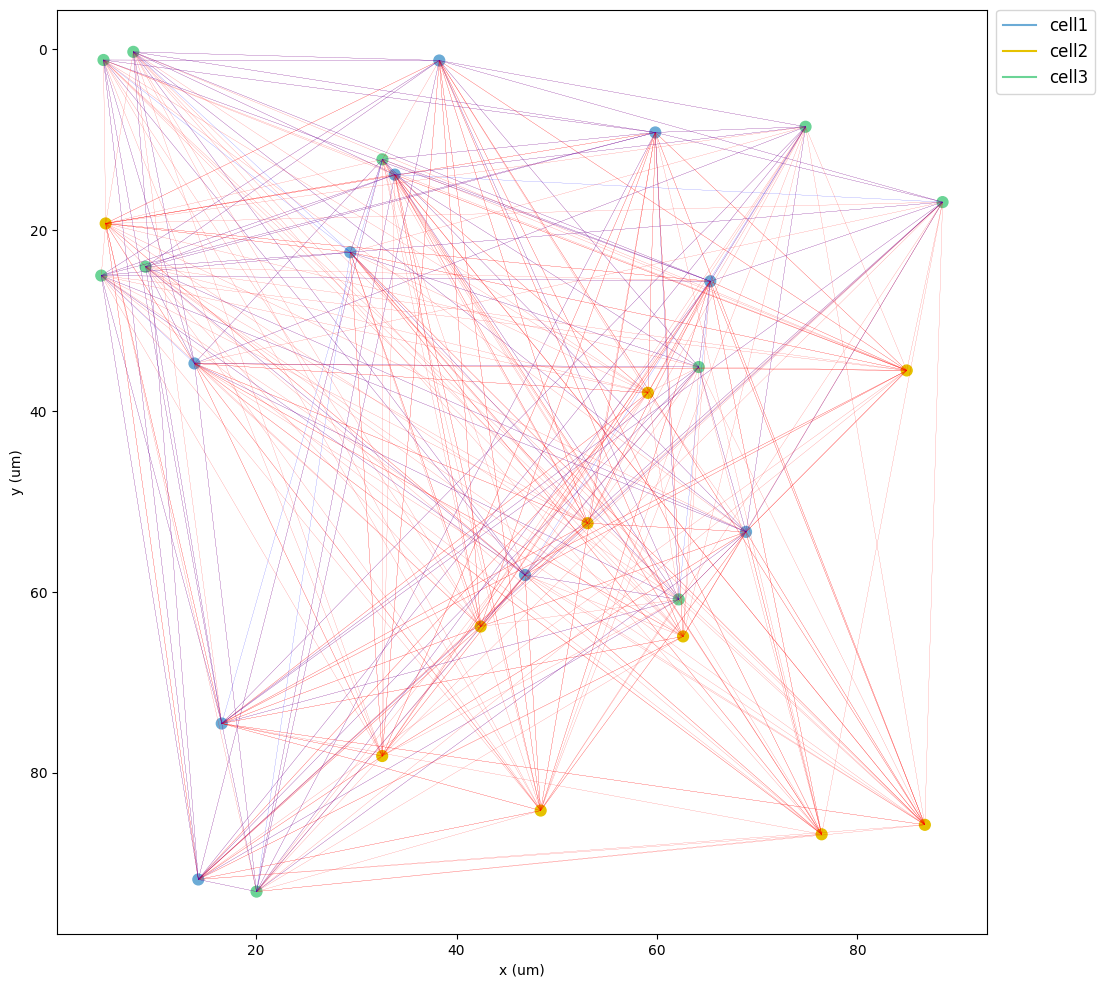

  Done; plotting time = 1.57 s

Total time = 2.91 s


In [112]:
sim.createSimulateAnalyze(netParams=netParams, simConfig=simConfig)

<font color= 'red'> Alors, le raster plot il était pas visible alors j'ai fait le truc du savefig = true et du coup ça fait un petit plot tout mimi qu'il faudra pas qu'on oublie d'envoyer avec, et sinon pour les paramètres pour la connection entre population 1 et population 3 bah j'ai testé plein de trucs au pif, donc je pense il ne reste qu'à essayer les différents trucs et dire ce qui change à chaque fois dans un petit paté de blabla et all good :) 

# <font color= 'red'>Ex 2: </font>Mouse cortical network simulation

<font size='3'>Following the line of tutorial 02, build a cortical-like network of dimensions: `x = 100 µm`, `y = 1210 µm` and `z = 100 µm`. Find the layer thickness for the mouse cortex in the paper __DeFelipe et al., 2002__ loaded in the moodle and assign these values to your model.

<font size='3'>Your network should have around 400 neurons in total. Cortical layer 1 is composed only by inhibitory cells and in the rest of the layers we can find both excitatory(E) and inhibitory(I) neurons. Extract the ratios of neurons for each layer and proportions of E/I balance from the second paper __Billeh et al. 2020.__
    
<font size='3'>Use the same morphological, physiological, synaptic and stimulation parameters from tutorial 02 for the excitatory and inhibitory cell populations. Connect the excitatory cells so they target cells within L2/3 to L6. Connect the inhibitory cells only to excitatory cells with a connection probability that decays exponentially as a function of distance `0.3*exp(-dist_3D/probLengthConst)`.
    
<font size='3'>Run a simulation of 1000 ms, internal integration time steps of 0.05 ms and record steps time of 1 ms. Plot the 2D network representation of the cell locations and connections and the connectivity matrix. 
    
<font size='3'>Based on what you learned in the lecture about the network regime map and in-silico experiments, what can you say about the activity of this cortical network? What type of activity does the network exhibit? What mechanisms have been associated with this activity, how could we attempt to change it?
    
<font size='3'><font color= 'red'>[3.5 pts]</font>

# Optional Detailed cell morphology network

<font size='3'>Build a network with the set of morphologies assigned to your group in week 7. For each morphology you have to create a `.py` file with the morphological and biophysical characteristics for each cell. For this purpose you can use biophysics from tutorial 3 and created there files `Inh01.py` and  `Pyr01.py`

<font size='3'>Create 5 populations of cells with 5 cells each and the 3D compartmental Hodgkin-Huxley type cell (HH3D) taking care of the differences between pyramidal (E) and inhibitory cells (I). Connect the two inhibitory cell populations to the excitatory cell populations but not between them.
    
<font size='3'>Use the same synaptic and stimulation parameters used in tutorial 03. Add background stimulation to all of the neurons  with a firing rate of 100 Hz and noise level of 0.5 and connect it with a weight of 0.01 and a delay of 5 ms.  Run a simulation of 500 ms. Plot the raster plot, sample trace from each neuron populations, the 2D network representation of the cell locations and connections and the connectivity matrix.
    
<font size='3'>What can you observe? 
   